# News Mood Data Analysis
 - sadfsdf
 - sdafsdf


In [1]:
# Import deficiencies
import pandas as pd
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "fkxBgq9L4nHMvZOh8sJgWhPxI"
consumer_secret = "4vbR5Pc69sHkD2rRt4BySnKoknx2YfAr3U3RRKnPhqatISZi8D"
access_token = "2697326256-8rbvcf2wW0JSdcuS3cyZf6DO8odMbnW5geqytCS"
access_token_secret = "UEpJXymFPkKZmoanJRVMURa4DodWzaDgZpWY2bLAmIKTd"

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target news sites for sentiment analysis
news_list = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

# Array to hold setiment
sentiments = []

In [6]:
# Loop through all target users
for target_news in news_list:
    
    # Counter
    counter = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_news,count=100, result_type="recent")

    # Format news org name for df later
    news_org = target_news.replace("@", "")

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
#             print("Tweet %s: %s" % (counter, tweet["text"]))
#             print("Tweet %s: %s" % (counter, tweet["created_at"]))
#             print()

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        tweets_ago = counter

        # Add sentiments for each tweet into an array
        sentiments.append({"News Org": tweet["user"]["name"],
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Tweets Ago": counter})

        # Add to counter 
        counter = counter + 1
    

In [7]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,News Org,Tweets Ago
0,0.0000,Thu Mar 08 20:03:04 +0000 2018,BBC,1
1,0.0000,Thu Mar 08 18:00:06 +0000 2018,BBC,2
2,-0.1027,Thu Mar 08 17:30:11 +0000 2018,BBC,3
3,0.0000,Thu Mar 08 17:00:09 +0000 2018,BBC,4
4,0.5719,Thu Mar 08 16:30:05 +0000 2018,BBC,5


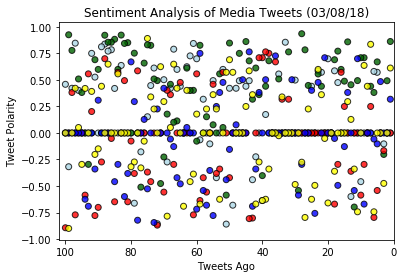

In [8]:
# Create plot
## MAYBE Create 5 diff df's and plot each on the same scatter plot?

color_map = {"BBC": "lightblue", "CBS": "darkgreen", "CNN": "red", "Fox News": "blue", "The New York Times": "yellow"}

# plt.scatter(sentiments_BBC["Tweets Ago"],
#          sentiments_BBC["Compound"],
#          color = "lightblue",
#          edgecolor = "black",
#          alpha=0.5)

# plt.scatter(sentiments_CBS["Tweets Ago"],
#          sentiments_CBS["Compound"],
#          color = "darkgreen",
#          edgecolor = "black",
#          alpha=0.5)


# Scatter plot without the df's splitting
plt.scatter(sentiments_pd["Tweets Ago"],
         sentiments_pd["Compound"],
         color = [color_map[x] for x in sentiments_pd["News Org"]],
         edgecolor = "black",
         alpha=0.8)

# Set x-limits
plt.xlim(102,0)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

# Create a legend
# lgnd = plt.legend(fontsize="small", mode="Expanded", 
#                   numpoints=1, scatterpoints=1, 
#                   loc="center left", 
#                   bbox_to_anchor=(1, .75),
#                   title="Media Sources", 
#                   labelspacing=0.5)

# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
# lgnd.legendHandles[4]._sizes = [30]

# Save Figure
#plt.savefig("Analysis/Sentiment_Analysis_Fig.png")

plt.show()

In [9]:
# Create new df that consolidates the compound sentiments for each news org
consolidated_sentiments_df = pd.DataFrame(sentiments_pd.groupby(["News Org"]).mean()["Compound"])
consolidated_sentiments_df = consolidated_sentiments_df.reset_index()
consolidated_sentiments_df

,News Org,Compound
0,BBC,0.179298
1,CBS,0.332212
2,CNN,-0.055804
3,Fox News,-0.041637
4,The New York Times,0.005501


In [10]:
# Create consolidated bar chart

x_axis = np.arange(len(consolidated_sentiments_df["News Org"]))

bar = plt.bar(x_axis, consolidated_sentiments_df["Compound"], 
          color=[color_map[x] for x in consolidated_sentiments_df["News Org"]], 
          edgecolor = "black", 
          width = 1)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [i for i in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])

# Adjusting y-limits
plt.ylim(min(consolidated_sentiments_df["Compound"])-0.05, max(consolidated_sentiments_df["Compound"]) + 0.05)

# Adding data labels above bars
news_bar = bar.patches

# Loop for adding data labels to each bar
for bars in news_bar:
    
    # Get X and Y placement of label from rect (bar)
    y_value = bars.get_height()
    x_value = bars.get_x() + rect.get_width() / 2

    # Number of points between bar and label
    space = 4
    
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        
        # Invert space to place label below
        space *= -1
        
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with three decimal place
    label = "{:.3f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords= "offset points", # Interpret `xytext` as offset in points
        ha= "center",                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.

# Incorporate the other graph properties
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")
plt.xlabel("News Organizations")

# Save Figure
#plt.savefig("Analysis/Overall_Media_Sentiment_Fig.png")

plt.show()

NameError: name 'rect' is not defined